In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import hvplot.pandas
from helpers import *
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#merging all the datasets into one
mergestorm_df = pd.concat( 
    map(pd.read_csv, [
                      "resources/stormevents_2022.csv", 
                      "resources/stormevents_2021.csv",
                      "resources/stormevents_2020.csv",
                      "resources/stormevents_2019.csv",
                      "resources/stormevents_2018.csv", 
                      "resources/stormevents_2017.csv", 
                      "resources/stormevents_2016.csv", 
                      "resources/stormevents_2015.csv", 
                      "resources/stormevents_2014.csv", 
                      "resources/stormevents_2013.csv", 
                      "resources/stormevents_2012.csv", 
                      "resources/stormevents_2011.csv", 
                      "resources/stormevents_2010.csv", 
                      "resources/stormevents_2009.csv", 
                      "resources/stormevents_2008.csv"]), ignore_index=True) 
mergestorm_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,...,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,...,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [3]:
#merging all the datasets into one for earliest available data years 
mergestorm1950_1964_df = pd.concat( 
    map(pd.read_csv, ["resources/stormevents_1950.csv", 
                      "resources/stormevents_1951.csv", 
                      "resources/stormevents_1952.csv", 
                      "resources/stormevents_1953.csv", 
                      "resources/stormevents_1954.csv", 
                      "resources/stormevents_1955.csv",
                      "resources/stormevents_1956.csv", 
                      "resources/stormevents_1957.csv", 
                      "resources/stormevents_1958.csv",
                      "resources/stormevents_1959.csv", 
                      "resources/stormevents_1960.csv", 
                      "resources/stormevents_1961.csv",
                      "resources/stormevents_1962.csv", 
                      "resources/stormevents_1963.csv", 
                      "resources/stormevents_1964.csv"]),
                      ignore_index=True)
mergestorm1950_1964_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [4]:
narrow_columns = ["YEAR", 
                    "STATE", 
                    "EVENT_TYPE",  
                    "INJURIES_DIRECT", 
                    "INJURIES_INDIRECT",
                    "DEATHS_DIRECT", 
                    "DEATHS_INDIRECT",
                    "DAMAGE_PROPERTY",
                    "DAMAGE_CROPS", 
                    "SOURCE", 
                    "MAGNITUDE", 
                    "MAGNITUDE_TYPE", 
                    "TOR_F_SCALE", 
                    "TOR_LENGTH",
                    "TOR_WIDTH",
                    "TOR_OTHER_CZ_STATE",
                    "BEGIN_LOCATION", 
                    "BEGIN_LAT", 
                    "BEGIN_LON", 
                    "END_LAT", 
                    "END_LON", 
                    "EPISODE_ID", 
                    "EVENT_ID",]

def clean_storm_df(dataFrame):
    narrow_df = dataFrame[narrow_columns] # reduce columns to relevant ones
    
    # translate tornado F scale into simple integer scale
    narrow_df['TOR_F_SCALE'] = narrow_df['TOR_F_SCALE'].apply(retype_tornado_scale)

    # fill missing values for damage columns
    narrow_df["DAMAGE_PROPERTY"] = narrow_df["DAMAGE_PROPERTY"].fillna("0.00K")
    narrow_df["DAMAGE_CROPS"] = narrow_df["DAMAGE_CROPS"].fillna("0.00K")

    # re-type damage values to float to support math operations
    narrow_df['DAMAGE_PROPERTY'] = narrow_df['DAMAGE_PROPERTY'].apply(retype_damage_value)
    narrow_df['DAMAGE_CROPS'] = narrow_df['DAMAGE_CROPS'].apply(retype_damage_value)

    # merge deaths/injuries/damages columns
    narrow_df["TOTAL DEATHS"] = narrow_df["DEATHS_DIRECT"] + narrow_df["DEATHS_INDIRECT"]
    narrow_df["TOTAL INJURIES"] = narrow_df["INJURIES_DIRECT"] + narrow_df["INJURIES_INDIRECT"]
    narrow_df["TOTAL DAMAGES"] = narrow_df["DAMAGE_PROPERTY"] + narrow_df["DAMAGE_CROPS"]

    # remove now extraneous columns; damages columns remain as we perform individual analyses
    narrow_df = narrow_df.drop(columns=["INJURIES_DIRECT", "INJURIES_INDIRECT","DEATHS_DIRECT", "DEATHS_INDIRECT"])

    # Narrow down events that have had at least one death and/or at least one injury 
    narrow_df = narrow_df.loc[(narrow_df["TOTAL DEATHS"] > 1) | (narrow_df["TOTAL INJURIES"] > 1)]

    # reset the index 
    narrow_df.reset_index(drop=True, inplace=True)

    return narrow_df

In [5]:
cleaned_2000s_df = clean_storm_df(mergestorm_df)
cleaned_1950_df = clean_storm_df(mergestorm1950_1964_df)
cleaned_1950_df.head()

,YEAR,STATE,EVENT_TYPE,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,...,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,1950,PENNSYLVANIA,Tornado,25000.0,0.0,NaN,0.0,NaN,2.0,12.9,...,NaN,40.58,-75.70,40.65,-75.47,NaN,10104927,0,2,25000.0
1,1950,OKLAHOMA,Tornado,250000.0,0.0,NaN,0.0,NaN,2.0,6.8,...,NaN,35.00,-96.25,35.07,-96.17,NaN,10099490,0,6,250000.0
2,1950,OKLAHOMA,Tornado,250000.0,0.0,NaN,0.0,NaN,4.0,4.5,...,NaN,35.08,-96.40,35.13,-96.35,NaN,10096223,5,32,250000.0
3,1950,OKLAHOMA,Tornado,25000.0,0.0,NaN,0.0,NaN,2.0,4.3,...,NaN,36.12,-97.83,36.17,-97.78,NaN,10096230,0,3,25000.0
4,1950,MISSISSIPPI,Tornado,25000.0,0.0,NaN,0.0,NaN,1.0,0.1,...,NaN,34.73,-88.27,NaN,NaN,NaN,10049534,0,2,25000.0


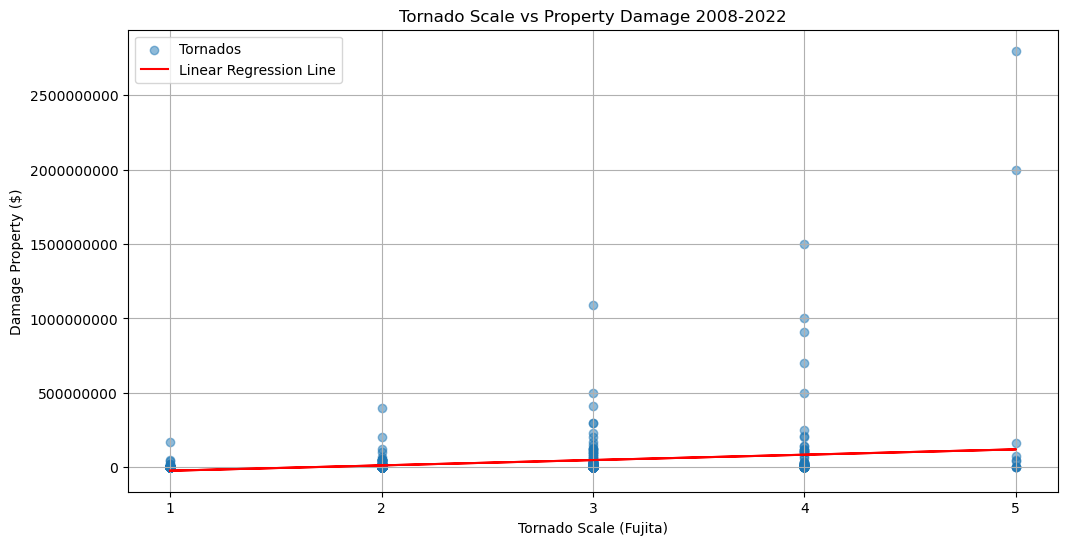

Linear Regression Coefficients:
Intercept (beta_0): -59903412.07077239
Slope (beta_1): 35881570.7649262
R-squared value: 0.05390218504106847


In [6]:
# Filter data to exclude rows where 'Tornado Scale' is 0
filtered_df = cleaned_2000s_df[cleaned_2000s_df['TOR_F_SCALE'] > 0]

# Calculate mean values
mean_length = filtered_df['TOR_F_SCALE'].mean()
mean_damage = filtered_df['DAMAGE_PROPERTY'].mean()

# Calculate coefficients of the linear regression equation (beta_1 and beta_0)
numerator = np.sum((filtered_df['TOR_F_SCALE'] - mean_length) * (filtered_df['DAMAGE_PROPERTY'] - mean_damage))
denominator = np.sum((filtered_df['TOR_F_SCALE'] - mean_length) ** 2)
beta_1 = numerator / denominator
beta_0 = mean_damage - beta_1 * mean_length

# Make predictions
filtered_df['DAMAGE_PREDICTED'] = beta_0 + beta_1 * filtered_df['TOR_F_SCALE']

# Visualize the linear regression line
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['TOR_F_SCALE'], filtered_df['DAMAGE_PROPERTY'], alpha=0.5, label='Tornados')
plt.plot(filtered_df['TOR_F_SCALE'], filtered_df['DAMAGE_PREDICTED'], color='red', label='Linear Regression Line')
plt.title('Tornado Scale vs Property Damage 2008-2022')
plt.xlabel('Tornado Scale (Fujita)')
plt.ylabel('Damage Property ($)')
plt.xticks(np.arange(min(filtered_df['TOR_F_SCALE']), max(filtered_df['TOR_F_SCALE'])+1, 1.0)) 
plt.ticklabel_format(style='plain')
plt.legend()
plt.grid(True)
plt.show()

# Display the coefficients
print("Linear Regression Coefficients:")
print("Intercept (beta_0):", beta_0)
print("Slope (beta_1):", beta_1)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((filtered_df['DAMAGE_PROPERTY'] - filtered_df['DAMAGE_PREDICTED']) ** 2)

# Calculate Total Sum of Squares (TSS)
tss = np.sum((filtered_df['DAMAGE_PROPERTY'] - mean_damage) ** 2)

# Calculate R-squared value
r_squared = 1 - (rss / tss)

# Display the R-squared value
print("R-squared value:", r_squared)

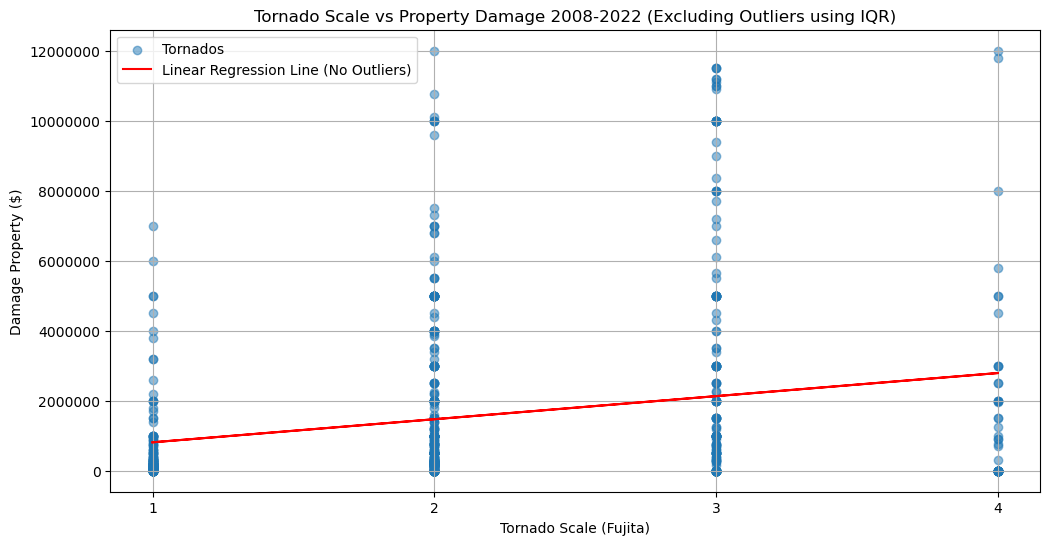

Linear Regression Coefficients (excluding outliers):
Intercept (beta_0): 151997.2028928853
Slope (beta_1): 659733.6034010946
R-squared value (excluding outliers): 0.050440311956482575


In [7]:
# Filter data to exclude rows where 'Tornado Scale' is 0
filtered_df = cleaned_2000s_df[cleaned_2000s_df['TOR_F_SCALE'] > 0]

# Calculate IQR for 'TOR_F_SCALE' and 'DAMAGE_PROPERTY'
Q1 = filtered_df[['TOR_F_SCALE', 'DAMAGE_PROPERTY']].quantile(0.25)
Q3 = filtered_df[['TOR_F_SCALE', 'DAMAGE_PROPERTY']].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask to exclude outliers
outliers_mask = ~((filtered_df[['TOR_F_SCALE', 'DAMAGE_PROPERTY']] < (Q1 - 1.5 * IQR)) | (filtered_df[['TOR_F_SCALE', 'DAMAGE_PROPERTY']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to exclude outliers
filtered_df_no_outliers = filtered_df[outliers_mask]

# Calculate mean values for the dataset without outliers
mean_length_no_outliers = filtered_df_no_outliers['TOR_F_SCALE'].mean()
mean_damage_no_outliers = filtered_df_no_outliers['DAMAGE_PROPERTY'].mean()

# Calculate coefficients of the linear regression equation (beta_1 and beta_0)
numerator_no_outliers = np.sum((filtered_df_no_outliers['TOR_F_SCALE'] - mean_length_no_outliers) * (filtered_df_no_outliers['DAMAGE_PROPERTY'] - mean_damage_no_outliers))
denominator_no_outliers = np.sum((filtered_df_no_outliers['TOR_F_SCALE'] - mean_length_no_outliers) ** 2)
beta_1_no_outliers = numerator_no_outliers / denominator_no_outliers
beta_0_no_outliers = mean_damage_no_outliers - beta_1_no_outliers * mean_length_no_outliers

# Make predictions for the dataset without outliers
filtered_df_no_outliers['DAMAGE_PREDICTED'] = beta_0_no_outliers + beta_1_no_outliers * filtered_df_no_outliers['TOR_F_SCALE']

# Visualize the linear regression line without outliers
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df_no_outliers['TOR_F_SCALE'], filtered_df_no_outliers['DAMAGE_PROPERTY'], alpha=0.5, label='Tornados')
plt.plot(filtered_df_no_outliers['TOR_F_SCALE'], filtered_df_no_outliers['DAMAGE_PREDICTED'], color='red', label='Linear Regression Line (No Outliers)')
plt.title('Tornado Scale vs Property Damage 2008-2022 (Excluding Outliers using IQR)')
plt.xlabel('Tornado Scale (Fujita)')
plt.ylabel('Damage Property ($)')
plt.xticks(np.arange(min(filtered_df_no_outliers['TOR_F_SCALE']), max(filtered_df_no_outliers['TOR_F_SCALE'])+1, 1.0)) 
plt.ticklabel_format(style='plain')
plt.legend()
plt.grid(True)
plt.show()

# Display the coefficients for the model without outliers
print("Linear Regression Coefficients (excluding outliers):")
print("Intercept (beta_0):", beta_0_no_outliers)
print("Slope (beta_1):", beta_1_no_outliers)

# Calculate R-squared value without outliers
rss_no_outliers = np.sum((filtered_df_no_outliers['DAMAGE_PROPERTY'] - filtered_df_no_outliers['DAMAGE_PREDICTED']) ** 2)
tss_no_outliers = np.sum((filtered_df_no_outliers['DAMAGE_PROPERTY'] - mean_damage_no_outliers) ** 2)
r_squared_no_outliers = 1 - (rss_no_outliers / tss_no_outliers)

# Display the R-squared value without outliers
print("R-squared value (excluding outliers):", r_squared_no_outliers)

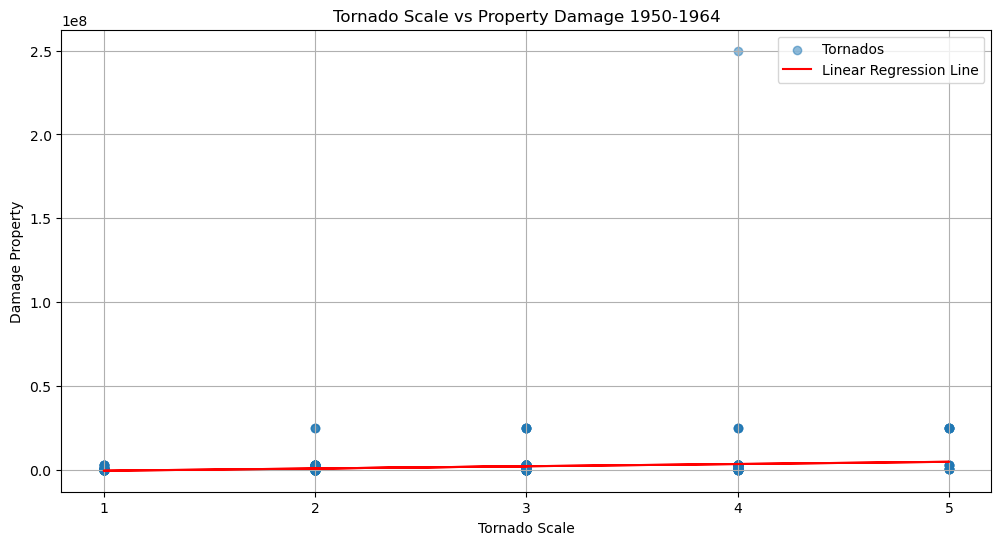

Linear Regression Coefficients:
Intercept (beta_0): -2041993.6954217893
Slope (beta_1): 1334114.233484269
R-squared value: 0.02525558034462383


In [8]:
# Filter data to exclude rows where 'Tornado Scale' is 0
filtered_df = cleaned_1950_df[cleaned_1950_df['TOR_F_SCALE'] > 0]

# Calculate mean values
mean_length = filtered_df['TOR_F_SCALE'].mean()
mean_damage = filtered_df['DAMAGE_PROPERTY'].mean()

# Calculate coefficients of the linear regression equation (beta_1 and beta_0)
numerator = np.sum((filtered_df['TOR_F_SCALE'] - mean_length) * (filtered_df['DAMAGE_PROPERTY'] - mean_damage))
denominator = np.sum((filtered_df['TOR_F_SCALE'] - mean_length) ** 2)
beta_1 = numerator / denominator
beta_0 = mean_damage - beta_1 * mean_length

# Make predictions
filtered_df['DAMAGE_PREDICTED'] = beta_0 + beta_1 * filtered_df['TOR_F_SCALE']

# Visualize the linear regression line
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['TOR_F_SCALE'], filtered_df['DAMAGE_PROPERTY'], alpha=0.5, label='Tornados')
plt.plot(filtered_df['TOR_F_SCALE'], filtered_df['DAMAGE_PREDICTED'], color='red', label='Linear Regression Line')
plt.title('Tornado Scale vs Property Damage 1950-1964')
plt.xlabel('Tornado Scale')
plt.ylabel('Damage Property')
plt.xticks(np.arange(min(filtered_df['TOR_F_SCALE']), max(filtered_df['TOR_F_SCALE'])+1, 1.0)) 
plt.legend()
plt.grid(True)
plt.show()

# Display the coefficients
print("Linear Regression Coefficients:")
print("Intercept (beta_0):", beta_0)
print("Slope (beta_1):", beta_1)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((filtered_df['DAMAGE_PROPERTY'] - filtered_df['DAMAGE_PREDICTED']) ** 2)

# Calculate Total Sum of Squares (TSS)
tss = np.sum((filtered_df['DAMAGE_PROPERTY'] - mean_damage) ** 2)

# Calculate R-squared value
r_squared = 1 - (rss / tss)

# Display the R-squared value
print("R-squared value:", r_squared)

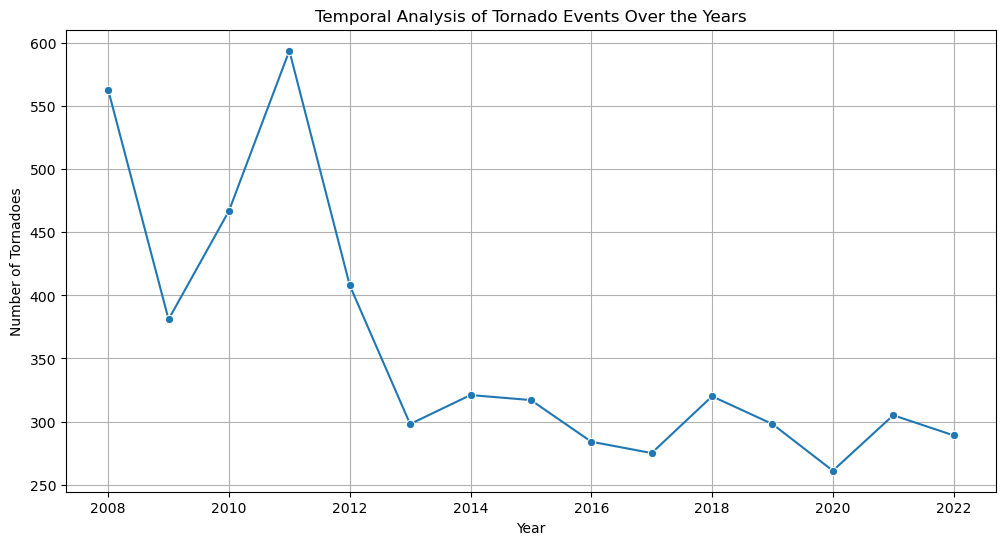

In [9]:

# Convert 'YEAR' to datetime format
cleaned_2000s_df['YEAR'] = pd.to_datetime(cleaned_2000s_df['YEAR'], format='%Y')

# Group by year and count the number of tornado events each year
temporal_analysis = cleaned_2000s_df.groupby(cleaned_2000s_df['YEAR'].dt.year)['EVENT_ID'].count()

# Plotting the temporal analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x=temporal_analysis.index, y=temporal_analysis.values, marker='o')
plt.title('Temporal Analysis of Tornado Events Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.grid(True)
plt.show()

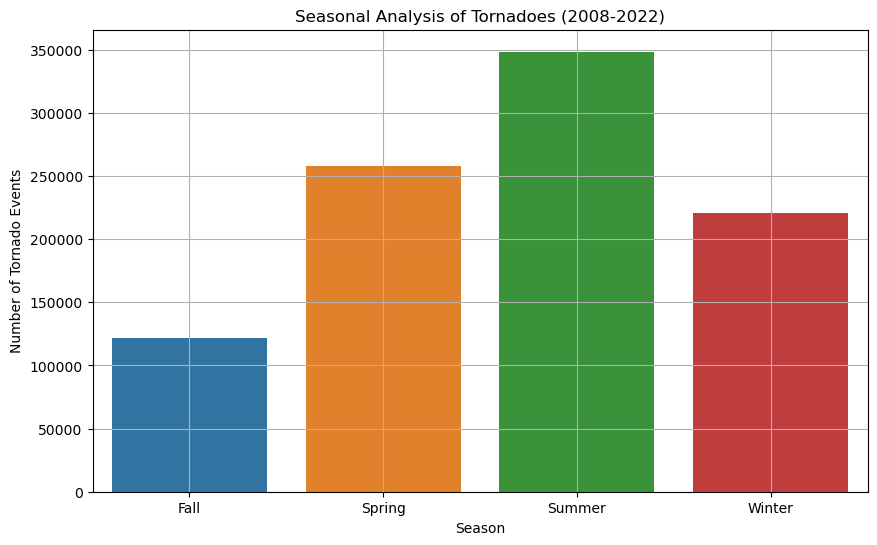

In [10]:
# Convert 'BEGIN_YEARMONTH' to datetime format
mergestorm_df['DATE'] = pd.to_datetime(mergestorm_df['BEGIN_YEARMONTH'], format='%Y%m')

# Define a function to categorize months into seasons
def categorize_season(month):
    if month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # Fall: September, October, November
        return 'Fall'
    else:  # Winter: December, January, February
        return 'Winter'

# Apply the categorization to create a new 'SEASON' column
mergestorm_df['SEASON'] = mergestorm_df['DATE'].dt.month.apply(categorize_season)

# Group by season and count the number of tornado events in each season
seasonal_analysis = mergestorm_df.groupby('SEASON')['EVENT_ID'].count()

# Plotting the seasonal analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_analysis.index, y=seasonal_analysis.values)
plt.title('Seasonal Analysis of Tornadoes (2008-2022)')
plt.xlabel('Season')
plt.ylabel('Number of Tornado Events')
plt.grid(True)
plt.show()

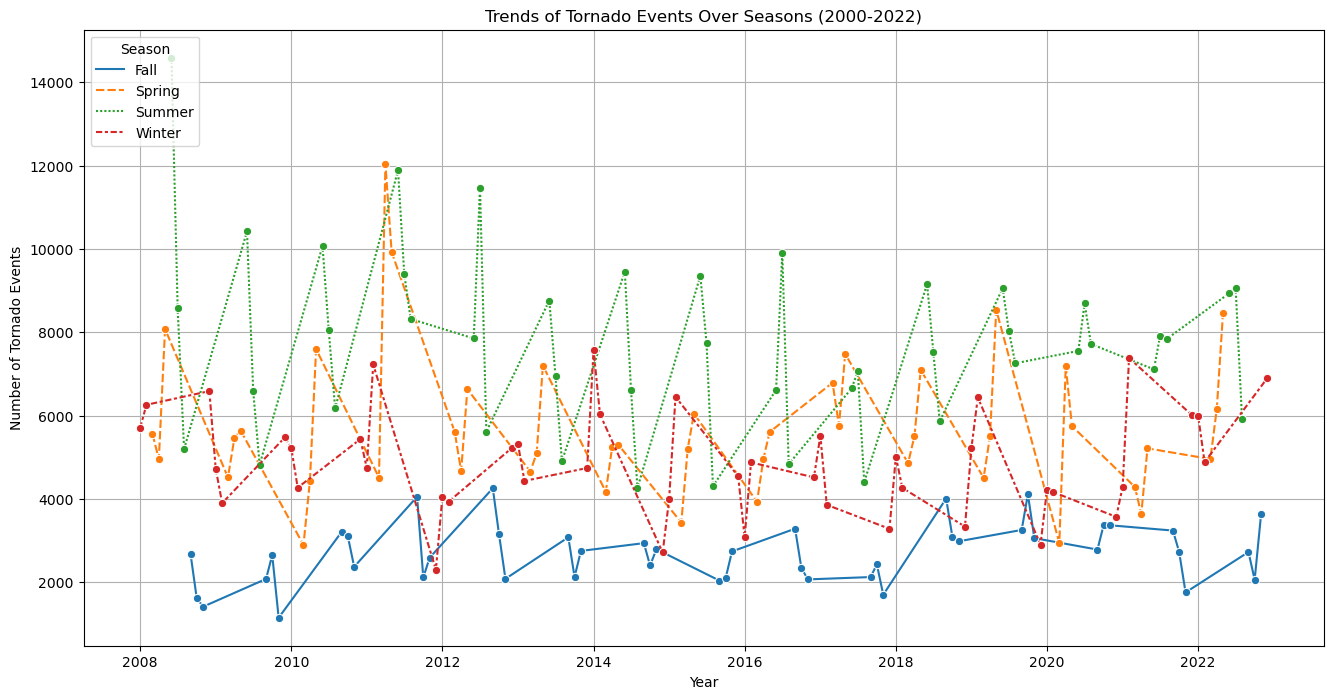

In [11]:
# Convert 'BEGIN_YEARMONTH' to datetime format
mergestorm_df['DATE'] = pd.to_datetime(mergestorm_df['BEGIN_YEARMONTH'], format='%Y%m')

# Define a function to categorize months into seasons
def categorize_season(month):
    if month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # Fall: September, October, November
        return 'Fall'
    else:  # Winter: December, January, February
        return 'Winter'

# Apply the categorization to create a new 'SEASON' column
mergestorm_df['SEASON'] = mergestorm_df['DATE'].dt.month.apply(categorize_season)

# Group by year and season, count the number of tornado events, and unstack the data
seasonal_trends = mergestorm_df.groupby(['DATE', 'SEASON'])['EVENT_ID'].count().unstack()

# Plotting the trends over time
plt.figure(figsize=(16, 8))
sns.lineplot(data=seasonal_trends, marker='o')
plt.title('Trends of Tornado Events Over Seasons (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Tornado Events')
plt.grid(True)
plt.legend(title='Season', loc='upper left')
plt.show()

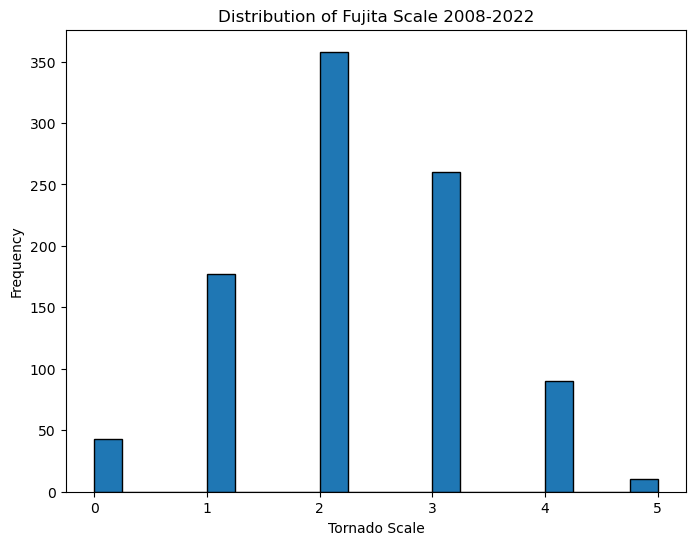

In [12]:
# Visualize the TOR_F_SCALE distribution
plt.figure(figsize=(8, 6))
plt.hist(cleaned_2000s_df['TOR_F_SCALE'], bins=20, edgecolor='black')
plt.title('Distribution of Fujita Scale 2008-2022')
plt.xlabel('Tornado Scale')
plt.ylabel('Frequency')
plt.show()

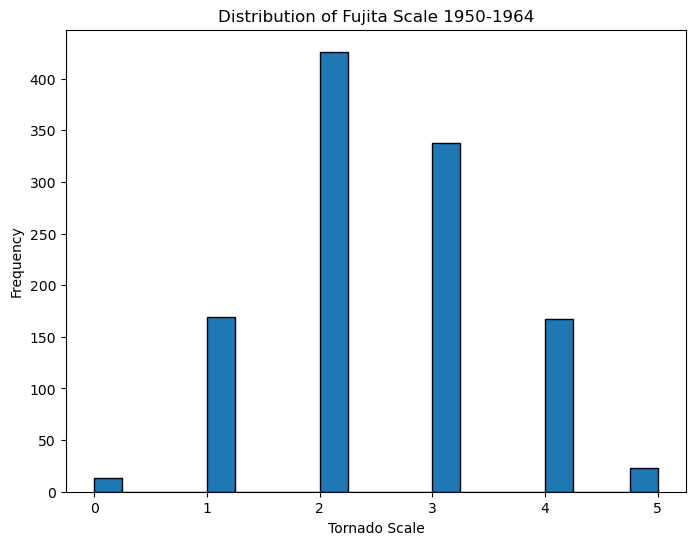

In [13]:
# Visualize the TOR_F_SCALE distribution
plt.figure(figsize=(8, 6))
plt.hist(cleaned_1950_df['TOR_F_SCALE'], bins=20, edgecolor='black')
plt.title('Distribution of Fujita Scale 1950-1964')
plt.xlabel('Tornado Scale')
plt.ylabel('Frequency')
plt.show()

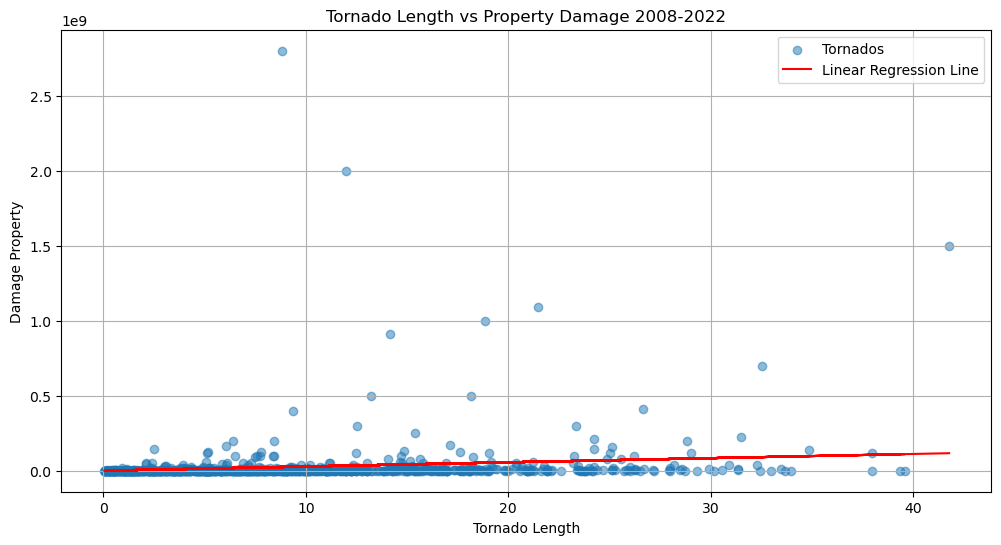

Linear Regression Coefficients:
Intercept (beta_0): 246981.31399885938
Slope (beta_1): 2787175.4466986638
R-squared value: 0.9766280195958863


In [14]:
# Calculate mean values
mean_length = cleaned_2000s_df['TOR_LENGTH'].mean()  # Change 'TOR_F_SCALE' to 'TOR_LENGTH'
mean_damage = cleaned_2000s_df['DAMAGE_PROPERTY'].mean()

# Calculate coefficients of the linear regression equation (beta_1 and beta_0)
numerator = np.sum((cleaned_2000s_df['TOR_LENGTH'] - mean_length) * (cleaned_2000s_df['DAMAGE_PROPERTY'] - mean_damage)) 
denominator = np.sum((cleaned_2000s_df['TOR_LENGTH'] - mean_length) ** 2)  
beta_1 = numerator / denominator
beta_0 = mean_damage - beta_1 * mean_length

# Make predictions
cleaned_2000s_df['DAMAGE_PREDICTED'] = beta_0 + beta_1 * cleaned_2000s_df['TOR_LENGTH'] 

# Visualize the linear regression line
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_2000s_df['TOR_LENGTH'], cleaned_2000s_df['DAMAGE_PROPERTY'], alpha=0.5, label='Tornados')
plt.plot(cleaned_2000s_df['TOR_LENGTH'], cleaned_2000s_df['DAMAGE_PREDICTED'], color='red', label='Linear Regression Line')
plt.title('Tornado Length vs Property Damage 2008-2022')  
plt.xlabel('Tornado Length')  
plt.ylabel('Damage Property')
plt.legend()
plt.grid(True)
plt.show()

# Display the coefficients
print("Linear Regression Coefficients:")
print("Intercept (beta_0):", beta_0)
print("Slope (beta_1):", beta_1)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((cleaned_2000s_df['DAMAGE_PROPERTY'] - cleaned_2000s_df['DAMAGE_PREDICTED']) ** 2)

# Calculate Total Sum of Squares (TSS)
tss = np.sum((cleaned_2000s_df['DAMAGE_PROPERTY'] - mean_damage) ** 2)

# Calculate R-squared value
r_squared = 1 - (rss / tss)

# Display the R-squared value
print("R-squared value:", r_squared)

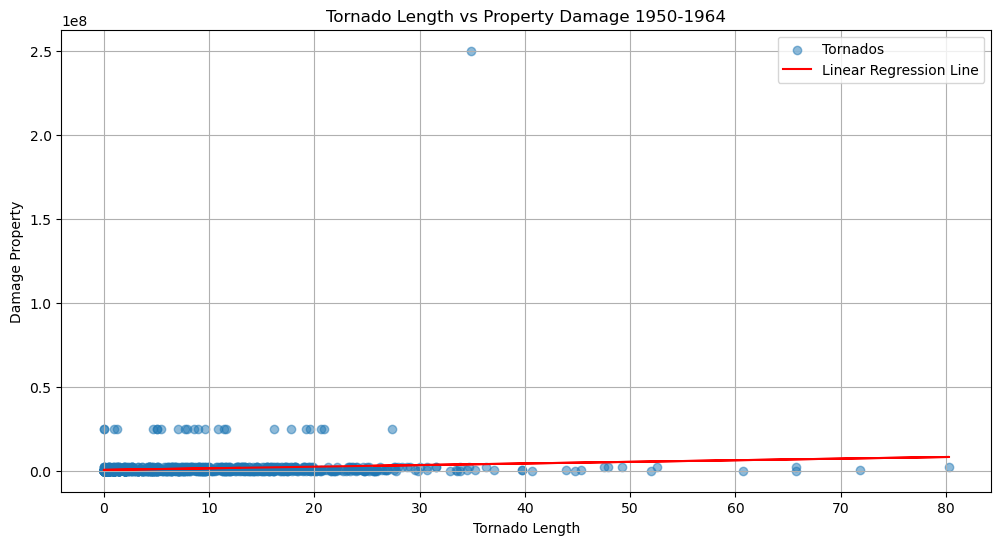

Linear Regression Coefficients:
Intercept (beta_0): 479828.2709259419
Slope (beta_1): 96024.87687879111
R-squared value: 0.012661027871119335


In [15]:
# Calculate mean values
mean_length = cleaned_1950_df['TOR_LENGTH'].mean()  
mean_damage = cleaned_1950_df['DAMAGE_PROPERTY'].mean()

# Calculate coefficients of the linear regression equation (beta_1 and beta_0)
numerator = np.sum((cleaned_1950_df['TOR_LENGTH'] - mean_length) * (cleaned_1950_df['DAMAGE_PROPERTY'] - mean_damage))
denominator = np.sum((cleaned_1950_df['TOR_LENGTH'] - mean_length) ** 2) 
beta_1 = numerator / denominator
beta_0 = mean_damage - beta_1 * mean_length

# Make predictions
cleaned_1950_df['DAMAGE_PREDICTED'] = beta_0 + beta_1 * cleaned_1950_df['TOR_LENGTH']  

# Visualize the linear regression line
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_1950_df['TOR_LENGTH'], cleaned_1950_df['DAMAGE_PROPERTY'], alpha=0.5, label='Tornados')
plt.plot(cleaned_1950_df['TOR_LENGTH'], cleaned_1950_df['DAMAGE_PREDICTED'], color='red', label='Linear Regression Line')
plt.title('Tornado Length vs Property Damage 1950-1964') 
plt.xlabel('Tornado Length') 
plt.ylabel('Damage Property')
plt.legend()
plt.grid(True)
plt.show()

# Display the coefficients
print("Linear Regression Coefficients:")
print("Intercept (beta_0):", beta_0)
print("Slope (beta_1):", beta_1)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((cleaned_1950_df['DAMAGE_PROPERTY'] - cleaned_1950_df['DAMAGE_PREDICTED']) ** 2)

# Calculate Total Sum of Squares (TSS)
tss = np.sum((cleaned_1950_df['DAMAGE_PROPERTY'] - mean_damage) ** 2)

# Calculate R-squared value
r_squared = 1 - (rss / tss)

# Display the R-squared value
print("R-squared value:", r_squared)